In [1]:
# !pip install kedro

In [2]:
import pandas as pd

In [11]:
data = pd.read_csv('../data/01_raw/data.csv')
data.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


In [12]:
data = data[data['shot_type'] == '2PT Field Goal']
data = data[['lat','lon','minutes_remaining','period','playoffs','shot_distance','shot_made_flag']]
data = data.dropna()

In [16]:
data.columns

Index(['lat', 'lon', 'minutes_remaining', 'period', 'playoffs',
       'shot_distance', 'shot_made_flag'],
      dtype='object')

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
lat,20285.0,33.980645,0.065895,33.5433,33.9263,33.9993,34.0443,34.0883
lon,20285.0,-118.262310,0.093401,-118.4878,-118.3128,-118.2698,-118.1948,-118.0498
minutes_remaining,20285.0,5.100173,3.423866,0.0000,2.0000,5.0000,8.0000,11.0000
period,20285.0,2.471974,1.148192,1.0000,1.0000,3.0000,3.0000,7.0000
playoffs,20285.0,0.148731,0.355831,0.0000,0.0000,0.0000,0.0000,1.0000
shot_distance,20285.0,10.216317,7.559547,0.0000,1.0000,12.0000,17.0000,50.0000
shot_made_flag,20285.0,0.477348,0.499499,0.0000,0.0000,0.0000,1.0000,1.0000


In [6]:
X = df_filtrado.drop('shot_made_flag', axis=1)
X

,lat,lon,minutes_remaining,period,playoffs,shot_distance,shot_type
1,34.0443,-118.4268,10,1,0,15,2PT Field Goal
2,33.9093,-118.3708,7,1,0,16,2PT Field Goal
3,33.8693,-118.1318,6,1,0,22,2PT Field Goal
4,34.0443,-118.2698,6,2,0,0,2PT Field Goal
5,34.0553,-118.4148,9,3,0,14,2PT Field Goal
...,...,...,...,...,...,...,...
30690,33.9443,-118.3828,11,4,1,15,2PT Field Goal
30691,34.0443,-118.2698,7,4,1,0,2PT Field Goal
30692,33.9963,-118.2688,6,4,1,4,2PT Field Goal
30694,33.8783,-118.4038,3,4,1,21,2PT Field Goal


In [7]:
y = df_filtrado['shot_made_flag'] 
y

1        0.0
2        1.0
3        0.0
4        1.0
5        0.0
        ... 
30690    0.0
30691    0.0
30692    0.0
30694    1.0
30696    0.0
Name: shot_made_flag, Length: 20285, dtype: float64

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [16]:
y_train

7006     0.0
20760    0.0
15143    0.0
10506    1.0
21377    0.0
        ... 
29740    0.0
23272    1.0
6023     1.0
1104     1.0
27185    1.0
Name: shot_made_flag, Length: 16228, dtype: float64

In [10]:
X_train

,lat,lon,minutes_remaining,period,playoffs,shot_distance,shot_type
7006,34.0343,-118.1288,1,2,0,14,2PT Field Goal
20760,33.9723,-118.0808,0,3,0,20,2PT Field Goal
15143,33.8713,-118.1728,11,3,0,19,2PT Field Goal
10506,34.0443,-118.2698,11,2,0,0,2PT Field Goal
21377,33.8543,-118.2698,11,3,0,19,2PT Field Goal
...,...,...,...,...,...,...,...
29740,34.0523,-118.0718,9,3,1,19,2PT Field Goal
23272,34.0443,-118.2698,0,1,0,0,2PT Field Goal
6023,34.0523,-118.0838,2,3,0,18,2PT Field Goal
1104,34.0403,-118.3618,3,3,0,9,2PT Field Goal


In [13]:
from pycaret.classification import *

# inicializa a configuração do pyCaret com os dados de treinamento e identificador de sessão
setup(data=X_train, target=y_train, session_id=123)

# treina o modelo de regressão logística
lr_model = create_model('lr')
lr_model

,Description,Value
0,Session id,123
1,Target,shot_made_flag
2,Target type,Binary
3,Original data shape,"(16228, 8)"
4,Transformed data shape,"(16228, 8)"
5,Transformed train set shape,"(11359, 8)"
6,Transformed test set shape,"(4869, 8)"
7,Numeric features,6
8,Categorical features,1
9,Preprocess,True


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5827,0.6131,0.4815,0.5749,0.5241,0.1578,0.1597
1,0.5731,0.5971,0.4926,0.5597,0.5240,0.1398,0.1408
2,0.5634,0.6087,0.4963,0.5467,0.5203,0.1214,0.1219
3,0.5625,0.5855,0.4760,0.5478,0.5094,0.1181,0.1191
4,0.5651,0.5791,0.4631,0.5529,0.5040,0.1222,0.1237
5,0.6109,0.6517,0.5258,0.6064,0.5632,0.2156,0.2174
6,0.5810,0.5754,0.4871,0.5714,0.5259,0.1548,0.1563
7,0.5880,0.6075,0.4899,0.5821,0.5320,0.1689,0.1709
8,0.5863,0.5947,0.5138,0.5753,0.5428,0.1672,0.1681


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
from sklearn.metrics import log_loss, f1_score

test_predictions = predict_model(lr_model, data=X_test)

# extrai o valor real do conjunto de teste
test_y = y_test

# calcula a métrica log loss entre a previsão e os valores reais
log_loss_value = log_loss(test_y, test_predictions['prediction_label'])
log_loss_value

15.423165463028685

In [17]:
metrics = {
        'log_loss_value': log_loss_value,
    }

metrics

{'log_loss_value': 15.423165463028685}

In [24]:
metrics = {
        'train_df_size': X_train.shape[0],
        'test_df_size': X_test.shape[0],
        'test_size_perc': 0.2
    }

In [25]:
metrics

{'train_df_size': 16228, 'test_df_size': 4057, 'test_size_perc': 0.2}

In [26]:
def split_metrics(X_train, X_test, test_size):
    metrics = {
        'train_df_size': X_train.shape[0],
        'test_df_size': X_test.shape[0],
        'test_size_perc': test_size
    }

    return {
        key: {'value': float(value), 'step': 1}
        for key, value in metrics.items()
    }

In [27]:
split_metrics(X_train, X_test, test_size = 0.2)

{'train_df_size': {'value': 16228.0, 'step': 1},
 'test_df_size': {'value': 4057.0, 'step': 1},
 'test_size_perc': {'value': 0.2, 'step': 1}}

In [22]:
# def split_metrics(X_train, X_test, test_size):
#     metrics = {
#         'train_df_size': X_train.shape[0],
#         'test_df_size': X_test.shape[0]
#         'test_size_perc': test_size
#     }

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   action_type         30697 non-null  object 
 1   combined_shot_type  30697 non-null  object 
 2   game_event_id       30697 non-null  int64  
 3   game_id             30697 non-null  int64  
 4   lat                 30697 non-null  float64
 5   loc_x               30697 non-null  int64  
 6   loc_y               30697 non-null  int64  
 7   lon                 30697 non-null  float64
 8   minutes_remaining   30697 non-null  int64  
 9   period              30697 non-null  int64  
 10  playoffs            30697 non-null  int64  
 11  season              30697 non-null  object 
 12  seconds_remaining   30697 non-null  int64  
 13  shot_distance       30697 non-null  int64  
 14  shot_made_flag      25697 non-null  float64
 15  shot_type           30697 non-null  object 
 16  shot

In [4]:
df_filtrado = df[['lat','lon','minutes_remaining','period','playoffs','shot_distance','shot_type','shot_made_flag']]
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   lat                30697 non-null  float64
 1   lon                30697 non-null  float64
 2   minutes_remaining  30697 non-null  int64  
 3   period             30697 non-null  int64  
 4   playoffs           30697 non-null  int64  
 5   shot_distance      30697 non-null  int64  
 6   shot_type          30697 non-null  object 
 7   shot_made_flag     25697 non-null  float64
dtypes: float64(3), int64(4), object(1)
memory usage: 1.9+ MB


In [5]:
df_filtrado['shot_type'].value_counts()

2PT Field Goal    24271
3PT Field Goal     6426
Name: shot_type, dtype: int64

In [6]:
df_filtrado = df_filtrado[df_filtrado['shot_type'] == '2PT Field Goal']
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24271 entries, 0 to 30696
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   lat                24271 non-null  float64
 1   lon                24271 non-null  float64
 2   minutes_remaining  24271 non-null  int64  
 3   period             24271 non-null  int64  
 4   playoffs           24271 non-null  int64  
 5   shot_distance      24271 non-null  int64  
 6   shot_type          24271 non-null  object 
 7   shot_made_flag     20285 non-null  float64
dtypes: float64(3), int64(4), object(1)
memory usage: 1.7+ MB


In [7]:
df_filtrado['shot_made_flag'].value_counts()

0.0    10602
1.0     9683
Name: shot_made_flag, dtype: int64

In [8]:
df_filtrado = df_filtrado.dropna()
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20285 entries, 1 to 30696
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   lat                20285 non-null  float64
 1   lon                20285 non-null  float64
 2   minutes_remaining  20285 non-null  int64  
 3   period             20285 non-null  int64  
 4   playoffs           20285 non-null  int64  
 5   shot_distance      20285 non-null  int64  
 6   shot_type          20285 non-null  object 
 7   shot_made_flag     20285 non-null  float64
dtypes: float64(3), int64(4), object(1)
memory usage: 1.4+ MB


In [9]:
df_filtrado.shape

(20285, 8)

In [18]:
# df_filtrado.to_parquet('../data/02_intermediate/data_filtered.parquet')

In [9]:
from sklearn.model_selection import train_test_split

X = df_filtrado.drop('shot_made_flag', axis=1)  
y = df_filtrado['shot_made_flag']  

# dividir os dados em conjuntos de treinamento e teste, com uma divisão aleatória e estratificada
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [11]:
y_test.shape[0]

4057

In [28]:
# # salva os conjuntos de treinamento e teste em arquivos parquet
# X_train.to_parquet('../data/04_feature/base_train.parquet', index=False)
# # y_train.to_parquet('../data/04_feature/target_train.parquet', index=False)

# X_test.to_parquet('../data/04_feature/base_test.parquet', index=False)
# # y_test.to_parquet('../data/04_feature/target_test.parquet', index=False)

In [10]:
# !pip install pycaret
# !pip install --upgrade pycaret
# !pip install --upgrade pip
# !pip install pycaret[full]

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,09:23:52
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5827,0.6131,0.4815,0.5749,0.5241,0.1578,0.1597
1,0.5731,0.5971,0.4926,0.5597,0.5240,0.1398,0.1408
2,0.5634,0.6087,0.4963,0.5467,0.5203,0.1214,0.1219
3,0.5625,0.5855,0.4760,0.5478,0.5094,0.1181,0.1191
4,0.5651,0.5791,0.4631,0.5529,0.5040,0.1222,0.1237
5,0.6109,0.6517,0.5258,0.6064,0.5632,0.2156,0.2174
6,0.5810,0.5754,0.4871,0.5714,0.5259,0.1548,0.1563
7,0.5880,0.6075,0.4899,0.5821,0.5320,0.1689,0.1709
8,0.5863,0.5947,0.5138,0.5753,0.5428,0.1672,0.1681


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

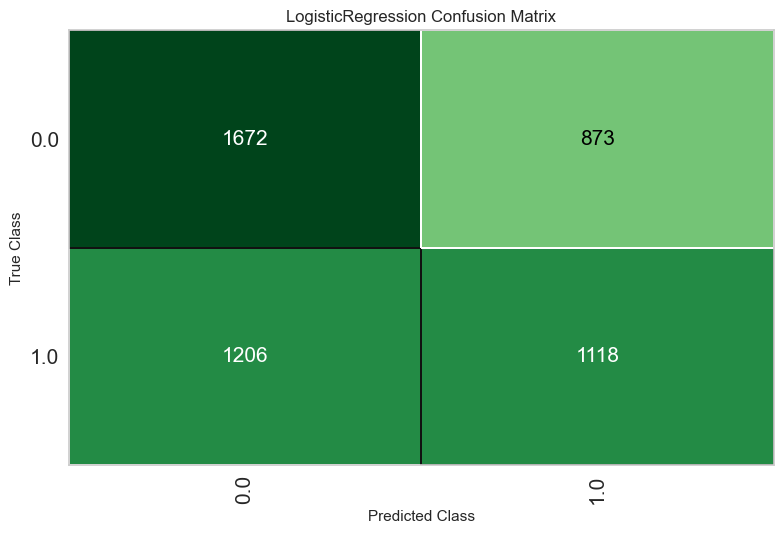

In [11]:
from pycaret.classification import *

# inicializa a configuração do pyCaret
setup(data=X_train, target=y_train, session_id=123)

# treina o modelo de regressão logística
lr_model = create_model('lr')

# avalia o desempenho do modelo
plot_model(lr_model, plot='confusion_matrix')

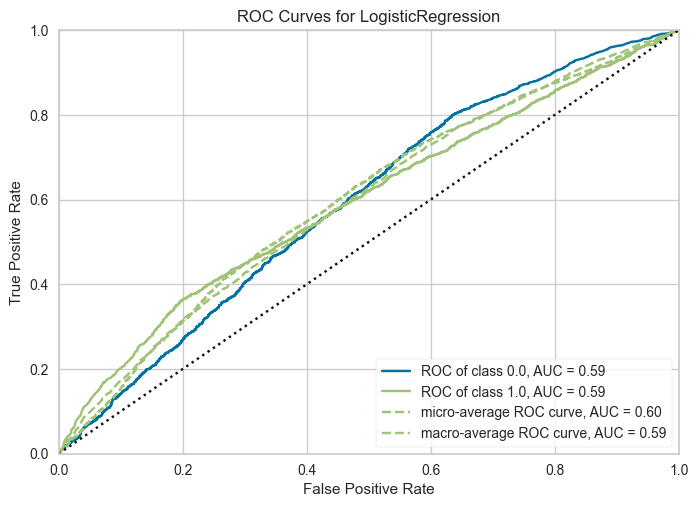

In [20]:
plot_model(lr_model, plot='auc')

In [14]:
# Avaliação do modelo
# evaluate_model(lr_model)

In [15]:
# X_test

In [16]:
from sklearn.metrics import log_loss
test_predictions = predict_model(lr_model, data=pd.DataFrame(X_test))
test_y = y_test
log_loss = log_loss(test_y, test_predictions['prediction_label'])
print(log_loss)

15.423165463028685


In [17]:
# log_loss

In [18]:
# test_predictions

In [19]:
# seleciona o melhor modelo de classificação
best_model = compare_models()

# treina o modelo selecionado
final_model = finalize_model(best_model)

# salva o modelo treinado
# save_model(final_model, 'models/classifier')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,09:25:38
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


In [20]:
final_model

Pipeline(memory=FastMemory(location=C:\Users\Winicius\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['lat', 'lon', 'minutes_remaining',
                                             'period', 'playoffs',
                                             'shot_distance'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean...
                 TransformerWrapper(exclude=None, include=['shot_type'],
                                    transformer=OneHotEncoder(cols=['shot_type'],
                                                              drop_invariant=False,
                                                              handle_missing='return_nan',
                                                              handle_unknown='value',
                                                              return_df=True,
                                                              use_cat_names=True,
                                                              verbose=0))),
                ('actual_estimator',
                 AdaBoostClassifier(algorithm='SAMME.R',
                                    base_estimator='deprecated', estimator=None,
                                    learning_rate=1.0, n_estimators=50,
                                    random_state=123))],
         verbose=False)